<a href="https://colab.research.google.com/github/Soyeon-Lee1112/Final-Team2/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9D%B4%EC%86%8C%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
#한글 글씨 폰트 설치

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [ ]:
df = pd.read_csv("/content/combined_dataset.csv")

In [ ]:
df['reviews_per_month'].describe()

,reviews_per_month
count,9949.000000
mean,1.951463
std,1.898202
min,0.010000
25%,0.460000
50%,1.350000
75%,2.980000
max,26.190000


In [ ]:
df['number_of_reviews_ltm'].describe()

,number_of_reviews_ltm
count,11446.000000
mean,17.279137
std,23.043885
min,0.000000
25%,1.000000
50%,6.000000
75%,27.000000
max,260.000000


In [ ]:
df['host_total_listings_count'].describe()

,host_total_listings_count
count,11446.000000
mean,37.146165
std,218.460690
min,0.000000
25%,3.000000
50%,9.000000
75%,28.000000
max,5679.000000


In [ ]:
# IQR 확인
Q1 = df['host_total_listings_count'].quantile(0.25)
Q3 = df['host_total_listings_count'].quantile(0.75)
IQR = Q3 - Q1

# 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 설정
outliers = df[(df['host_total_listings_count'] < lower_bound) | (df['host_total_listings_count'] > upper_bound)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"\nNumber of outliers: {len(outliers)}")

Q1: 3.0
Q3: 28.0
IQR: 25.0
Lower Bound for Outliers: -34.5
Upper Bound for Outliers: 65.5

Number of outliers: 1635


## 불린 컬럼 1/0으로 변경

In [ ]:
pd.set_option('display.max_rows', None)
type_check = df.dtypes

In [ ]:
print("컬럼별 타입 체크\n",type_check)

컬럼별 타입 체크
 id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                 

In [ ]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    if df[col].nunique() <= 2 and df[col].dropna().isin(['t', 'f']).all():
        df[col] = df[col].map({'t': 1, 'f': 0})
        print(f" '{col}'컬럼 t/f를 1/0으로 변경.")


 'host_is_superhost'컬럼 t/f를 1/0으로 변경.
 'host_has_profile_pic'컬럼 t/f를 1/0으로 변경.
 'host_identity_verified'컬럼 t/f를 1/0으로 변경.
 'has_availability'컬럼 t/f를 1/0으로 변경.
 'instant_bookable'컬럼 t/f를 1/0으로 변경.


In [ ]:
df['instant_bookable'].head()

,instant_bookable
0,1
1,1
2,0
3,1
4,0


## bookings_per_month 컬럼 생성

In [ ]:
# 리뷰 작성 비율
review_rate = 0.305

# bookings_per_month 컬럼 생성
df['bookings_per_month'] = df['reviews_per_month'] / review_rate

# 결과 확인
print(df[['reviews_per_month', 'bookings_per_month']].head())

   reviews_per_month  bookings_per_month
0               0.18            0.590164
1               0.69            2.262295
2               3.32           10.885246
3               0.10            0.327869
4               2.01            6.590164


In [ ]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
filtered_df = df[(df['bookings_per_month'] > 45) ]

display(filtered_df)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bookings_per_month
1643,19748903,https://www.airbnb.com/rooms/19748903,20240325142220,2024-03-25,city scrape,Private hotel room for 2 guests,The design hotel Bohem in the heart of Prague'...,Bohem Prague Hotel is situated in the center o...,https://a0.muscache.com/pictures/449faf70-d4b6...,137465310,...,4.59,4.85,NaN,0,4,0,3,0,22.70,74.426230
4708,643893146840281427,https://www.airbnb.com/rooms/643893146840281427,20240325142220,2024-03-26,city scrape,numa | Fancy room with bathtub in New Town,"Large and fully equipped, the apartments have ...","Located in Nové Město, Root Apartments are per...",https://a0.muscache.com/pictures/miso/Hosting-...,427490719,...,4.84,4.76,NaN,1,4,4,0,0,20.25,66.393443
4943,676741646155134041,https://www.airbnb.com/rooms/676741646155134041,20240325142220,2024-03-25,city scrape,Comfortable Room with Sleeping Loft,"This beautiful room, with its own bathroom wit...","Located in Prague, It is few steps away from v...",https://a0.muscache.com/pictures/miso/Hosting-...,56169761,...,4.66,4.68,NaN,1,10,10,0,0,16.29,53.409836
5362,767210708218959791,https://www.airbnb.com/rooms/767210708218959791,20240325142220,2024-03-25,city scrape,numa | Minimalist Room in the Golden Cross,"This cosy, welcoming accommodation offers one ...",Take a break from the routine and book a stay ...,https://a0.muscache.com/pictures/miso/Hosting-...,480287350,...,4.94,4.87,NaN,1,5,5,0,0,13.77,45.147541
6813,950919122947679651,https://www.airbnb.com/rooms/950919122947679651,20240325142220,2024-03-25,city scrape,NEW Renovated Central Chic-Retreat Aprt w/ Bal...,Welcome to our BRIGHT and CHARMING apartment i...,"Vinohrady is a stylish neighborhood in Prague,...",https://a0.muscache.com/pictures/miso/Hosting-...,291003728,...,4.58,4.63,NaN,1,7,7,0,0,13.90,45.573770
9840,898472877027467186,https://www.airbnb.com/rooms/898472877027467186,20231220035754,2023-12-20,previous scrape,Serviced apartment in Praha 1 · ★4.62 · 1 bedr...,NaN,"Location, location, location! Our neighborhood...",https://a0.muscache.com/pictures/miso/Hosting-...,291003728,...,4.92,4.54,NaN,1,9,9,0,0,26.19,85.868852


확인 결과 해당 숙소들은 같은 apt 내에 여러 호실을 운영하며 각 투숙객에게 entireroom을 제공하는 식으로 운영함.
그렇다면 하루에 한 팀만 묵을 수 있다는 제한이 사라지므로 이상치로 처리하지 않음.

## 호스트 사진에 얼굴 여부 컬럼 생성

In [ ]:
import cv2, io, requests
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

# ---------------------------------------------------------
# 1) 얼굴 검출기 준비
# ---------------------------------------------------------
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

def detect_face_pil(pil_img, min_size=(30,30), scaleFactor=1.1, minNeighbors=5):
    """PIL 이미지에서 얼굴 유무(True/False) 검출"""
    try:
        img = np.array(pil_img.convert('RGB'))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(
            gray, scaleFactor=scaleFactor,
            minNeighbors=minNeighbors,
            minSize=min_size
        )
        return len(faces) > 0
    except Exception:
        return np.nan   # 변환 실패 → NaN

# ---------------------------------------------------------
# 2) 이미지 다운로드
# ---------------------------------------------------------
SESSION = requests.Session()
SESSION.headers.update({"User-Agent": "Mozilla/5.0"})

def fetch_image(url, timeout=10):
    r = SESSION.get(url, stream=True, timeout=timeout)
    ct = r.headers.get('Content-Type','').lower()
    if 'image' not in ct:
        raise ValueError(f"Not an image content-type: {ct}")
    return Image.open(io.BytesIO(r.content))

# ---------------------------------------------------------
# 3) 얼굴 검출 컬럼 생성 (오류 → NaN)
# ---------------------------------------------------------
url_face_cache = {}  # 중복 URL 캐시
host_face_detected = pd.Series(np.nan, index=df.index)  # 초기값 NaN

urls = df['host_picture_url'].astype(str).str.strip().replace({'nan': ''})
targets = urls[urls != '']

for idx, url in tqdm(targets.items(), total=len(targets)):
    if url in url_face_cache:
        host_face_detected.iloc[idx] = url_face_cache[url]
        continue
    try:
        img = fetch_image(url, timeout=10)
        # 큰 이미지는 축소
        max_side = max(img.size)
        if max_side > 800:
            scale = 800.0 / max_side
            new_size = (int(img.size[0]*scale), int(img.size[1]*scale))
            img = img.resize(new_size)
        ok = detect_face_pil(img)   # True / False / NaN
    except Exception:
        ok = np.nan   # 다운로드/디코딩 오류 → NaN

    url_face_cache[url] = ok
    host_face_detected.iloc[idx] = ok

# Convert boolean values to 1 and 0, keep NaN as is
df['host_face_detected'] = host_face_detected.map({True: 1, False: 0, np.nan: np.nan})

100%|██████████| 11446/11446 [14:54<00:00, 12.80it/s]


In [ ]:
# '얼굴 있음', '얼굴 없음', NaN 개수
face_counts_with_nan = df['host_face_detected'].value_counts(dropna=False).reset_index()
face_counts_with_nan.columns = ['host_face_detected', 'count']

face_counts_with_nan['host_face_detected_label'] = face_counts_with_nan['host_face_detected'].map({
    0.0: '얼굴 없음',
    1.0: '얼굴 있음',
    pd.NA: 'NaN', # Map pandas.NA to 'NaN' string
    np.nan: 'NaN' # Map numpy.nan to 'NaN' string
})

print("호스트 사진 얼굴 여부별 숙소 개수 (NaN 포함):")
display(face_counts_with_nan[['host_face_detected_label', 'count']])

호스트 사진 얼굴 여부별 숙소 개수 (NaN 포함):


,host_face_detected_label,count
0,얼굴 없음,6089
1,얼굴 있음,5303
2,NaN,54


## 성공 여부 컬럼 생성

In [ ]:
df['success'] = (
    (df['number_of_reviews_ltm'] >= 5) &
    (df['review_scores_rating'] >= 4.9)
).astype(int)

df['success'].value_counts()

,count
success,
0,9712
1,1734


# 시각화

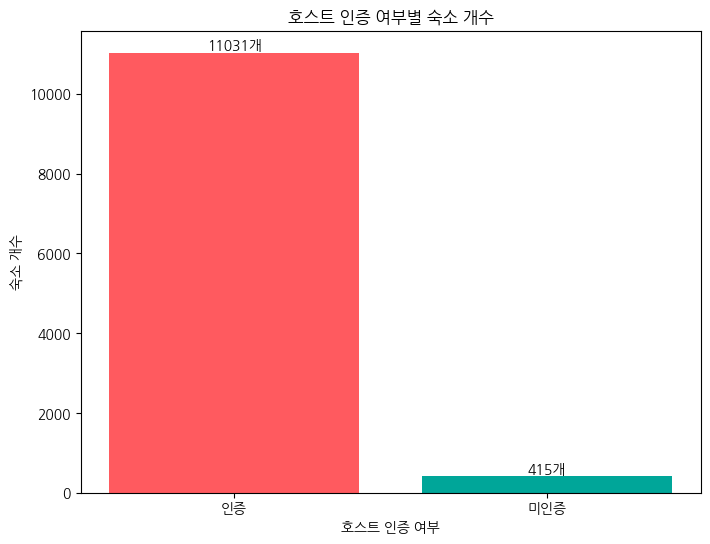

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the counts of each host identity verification status
verification_counts = df['host_identity_verified'].value_counts().reset_index()
verification_counts.columns = ['host_identity_verified', 'count']

# Map 0 and 1 to Korean labels for plotting
verification_counts['host_identity_verified_label'] = verification_counts['host_identity_verified'].map({0: '미인증', 1: '인증'})

# Ensure the order is '인증' then '미인증' for plotting
verification_counts = verification_counts.set_index('host_identity_verified_label').loc[['인증', '미인증']].reset_index()

# Create a bar chart using plt.bar
plt.figure(figsize=(8, 6))
bars = plt.bar(verification_counts['host_identity_verified_label'], verification_counts['count'], color=['#ff5a5f', '#00a699'])
plt.title('호스트 인증 여부별 숙소 개수')
plt.xlabel('호스트 인증 여부')
plt.ylabel('숙소 개수')

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}개', va='bottom', ha='center') # Add text label with '건'

plt.show()

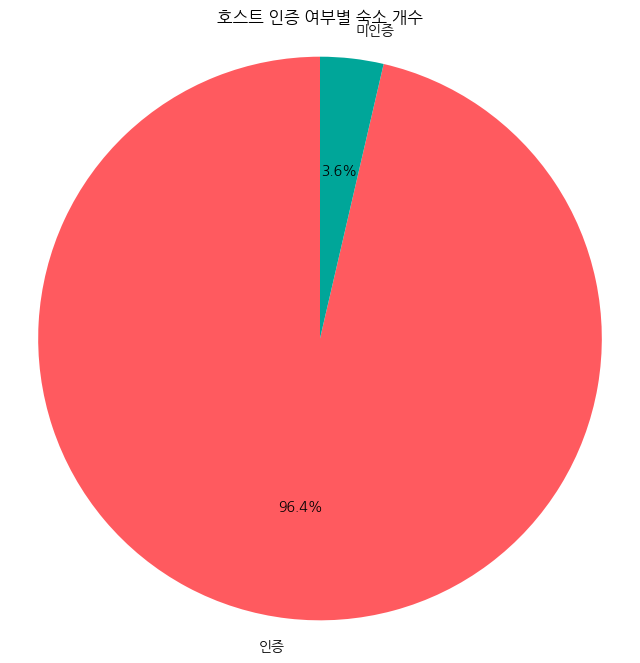

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the counts of each host identity verification status
verification_counts = df['host_identity_verified'].value_counts().reset_index()
verification_counts.columns = ['host_identity_verified', 'count']

# Map 0 and 1 to Korean labels for plotting
verification_counts['host_identity_verified_label'] = verification_counts['host_identity_verified'].map({0: '미인증', 1: '인증'})

# Ensure the order is '인증' then '미인증' for plotting
verification_counts = verification_counts.set_index('host_identity_verified_label').loc[['인증', '미인증']].reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(verification_counts['count'], labels=verification_counts['host_identity_verified_label'], autopct='%1.1f%%', startangle=90, colors=['#ff5a5f', '#00a699'])
plt.title('호스트 인증 여부별 숙소 개수')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

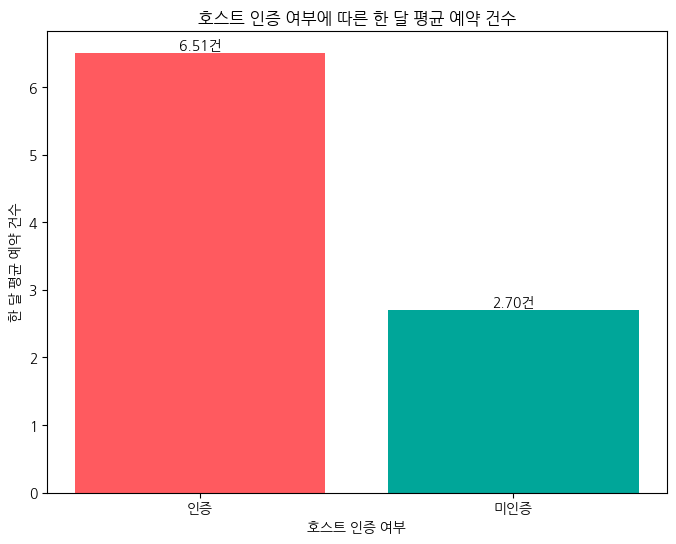

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the mean bookings per month for each host identity verification status (0 and 1)
mean_bookings = df.groupby('host_identity_verified')['bookings_per_month'].mean().reset_index()

# Create a bar chart using plt.bar
plt.figure(figsize=(8, 6))
bars = plt.bar(['인증', '미인증'], [mean_bookings[mean_bookings['host_identity_verified'] == 1]['bookings_per_month'].iloc[0],
                             mean_bookings[mean_bookings['host_identity_verified'] == 0]['bookings_per_month'].iloc[0]],
        color=['#ff5a5f', '#00a699']) # Swap colors to match the new order
plt.title('호스트 인증 여부에 따른 한 달 평균 예약 건수')
plt.xlabel('호스트 인증 여부')
plt.ylabel('한 달 평균 예약 건수')

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}건', va='bottom', ha='center') # Add text label with '건' and 2 decimal places

plt.show()

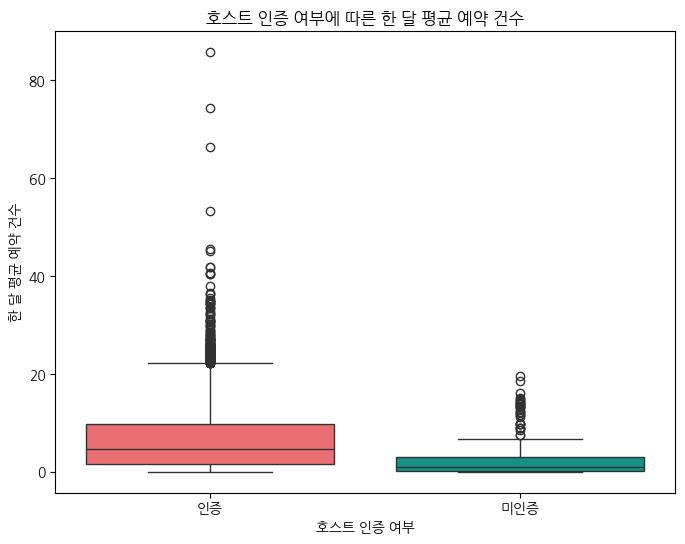

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the relationship
plt.figure(figsize=(8, 6))
# Map 0 and 1 to Korean labels for plotting
df['host_identity_verified_label'] = df['host_identity_verified'].map({0: '미인증', 1: '인증'})

sns.boxplot(x='host_identity_verified_label', y='bookings_per_month', data=df, order=['인증', '미인증'], palette=['#ff5a5f', '#00a699'], hue='host_identity_verified_label', legend=False)
plt.title('호스트 인증 여부에 따른 한 달 평균 예약 건수')
plt.xlabel('호스트 인증 여부')
plt.ylabel('한 달 평균 예약 건수')
plt.show()

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


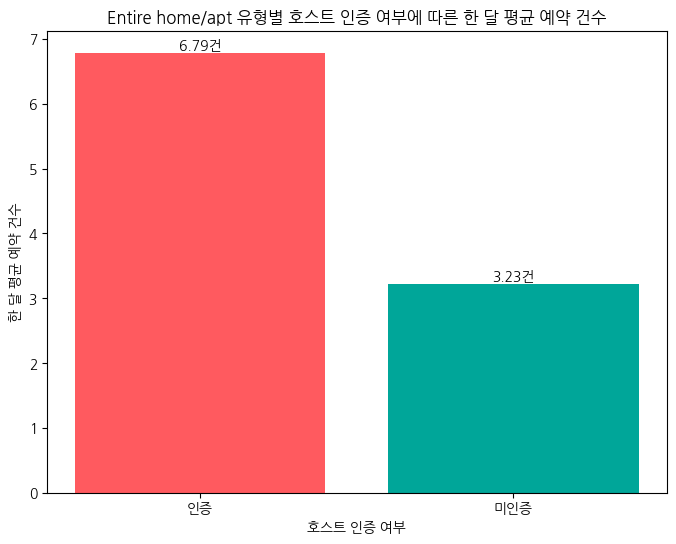

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


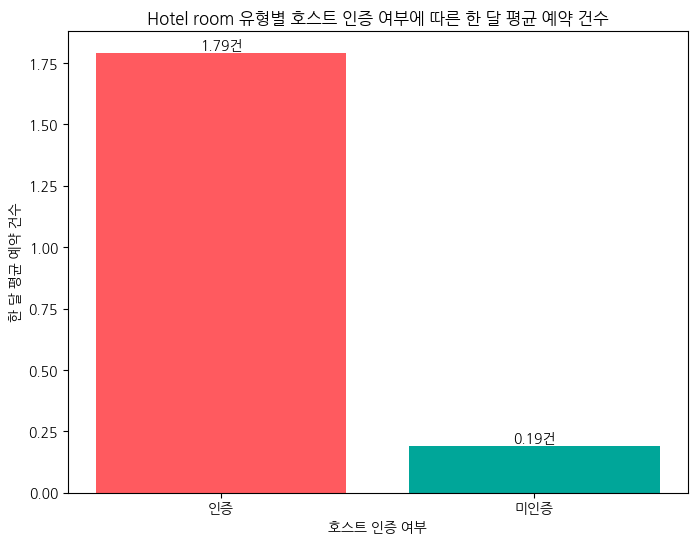

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


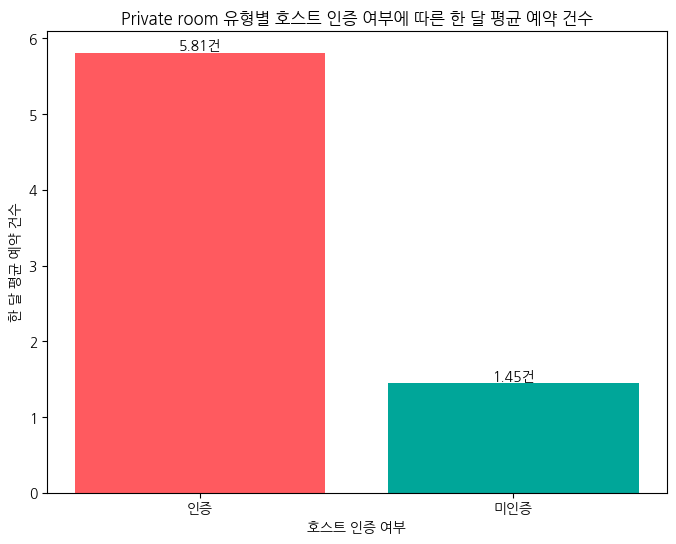

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


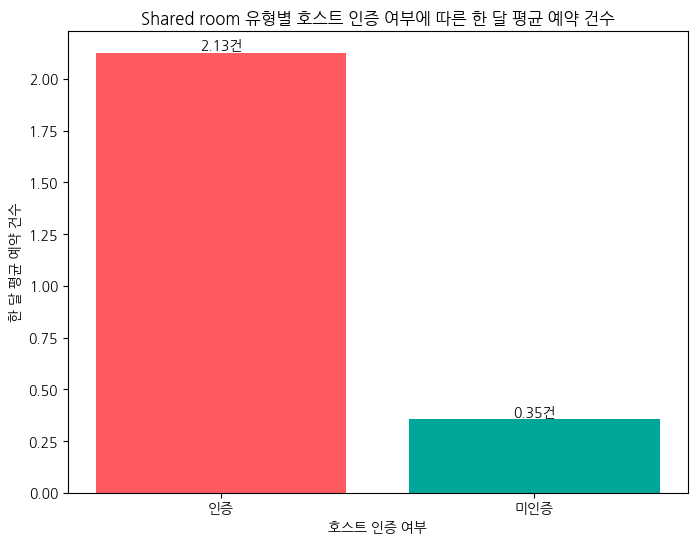

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the mean bookings per month for each room type and host identity verification status
mean_bookings_by_room_type = df.groupby(['room_type', 'host_identity_verified'])['bookings_per_month'].mean().reset_index()

# Get unique room types
room_types = mean_bookings_by_room_type['room_type'].unique()

# Create a bar chart for each room type
for room_type in room_types:
    plt.figure(figsize=(8, 6))
    subset = mean_bookings_by_room_type[mean_bookings_by_room_type['room_type'] == room_type]

    # Ensure both '인증' and '미인증' are present for plotting, add missing if necessary
    if 0 not in subset['host_identity_verified'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_identity_verified': [0], 'bookings_per_month': [0]})], ignore_index=True)
    if 1 not in subset['host_identity_verified'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_identity_verified': [1], 'bookings_per_month': [0]})], ignore_index=True)


    # Map 0 and 1 to Korean labels for plotting and order them
    subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})
    subset = subset.set_index('host_identity_verified_label').loc[['인증', '미인증']].reset_index()


    bars = plt.bar(subset['host_identity_verified_label'], subset['bookings_per_month'], color=['#ff5a5f', '#00a699'])
    plt.title(f'{room_type} 유형별 호스트 인증 여부에 따른 한 달 평균 예약 건수')
    plt.xlabel('호스트 인증 여부')
    plt.ylabel('한 달 평균 예약 건수')

    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}건', va='bottom', ha='center') # Add text label with '건' and 2 decimal places

    plt.show()

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


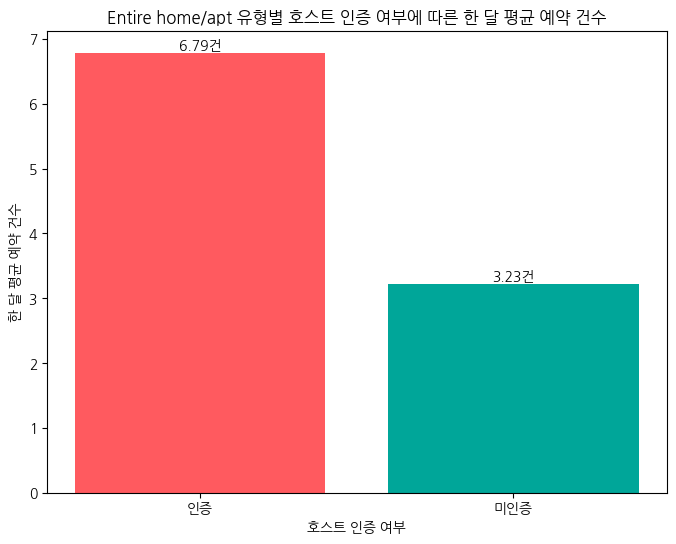

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


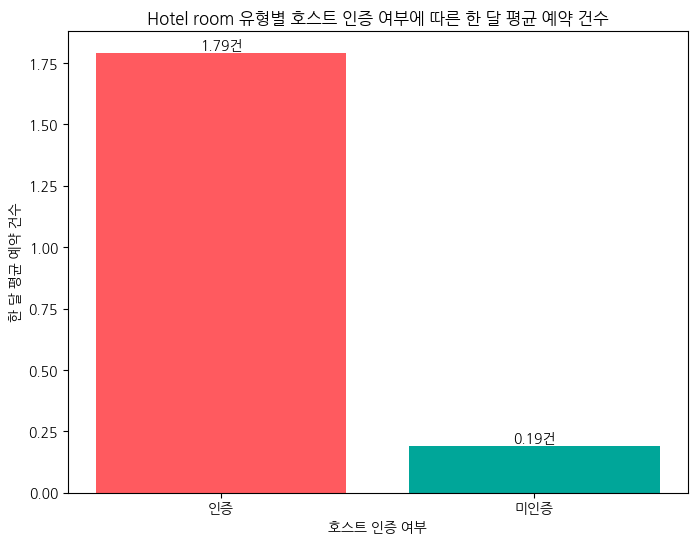

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


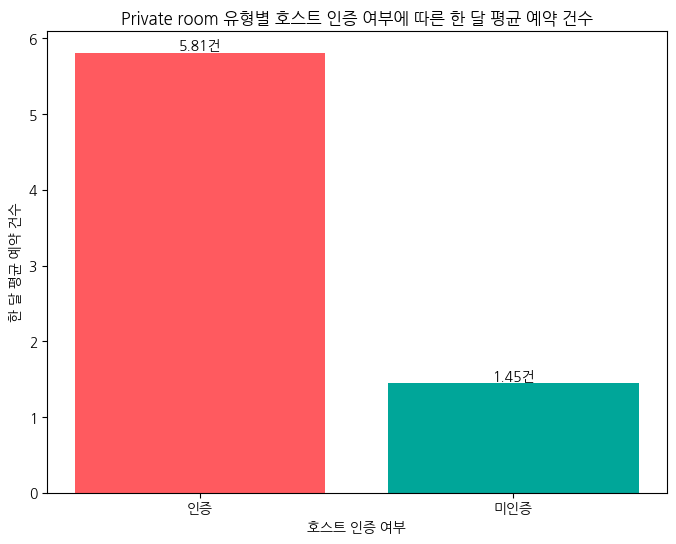

/tmp/ipython-input-183945988.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})


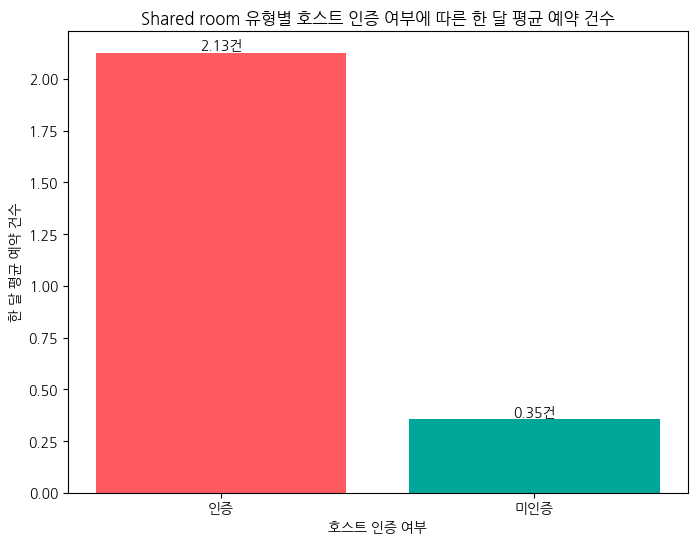

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the mean bookings per month for each room type and host identity verification status
mean_bookings_by_room_type = df.groupby(['room_type', 'host_identity_verified'])['bookings_per_month'].mean().reset_index()

# Get unique room types
room_types = mean_bookings_by_room_type['room_type'].unique()

# Create a bar chart for each room type
for room_type in room_types:
    plt.figure(figsize=(8, 6))
    subset = mean_bookings_by_room_type[mean_bookings_by_room_type['room_type'] == room_type]

    # Ensure both '인증' and '미인증' are present for plotting, add missing if necessary
    if 0 not in subset['host_identity_verified'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_identity_verified': [0], 'bookings_per_month': [0]})], ignore_index=True)
    if 1 not in subset['host_identity_verified'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_identity_verified': [1], 'bookings_per_month': [0]})], ignore_index=True)


    # Map 0 and 1 to Korean labels for plotting and order them
    subset['host_identity_verified_label'] = subset['host_identity_verified'].map({0: '미인증', 1: '인증'})
    subset = subset.set_index('host_identity_verified_label').loc[['인증', '미인증']].reset_index()


    bars = plt.bar(subset['host_identity_verified_label'], subset['bookings_per_month'], color=['#ff5a5f', '#00a699'])
    plt.title(f'{room_type} 유형별 호스트 인증 여부에 따른 한 달 평균 예약 건수')
    plt.xlabel('호스트 인증 여부')
    plt.ylabel('한 달 평균 예약 건수')

    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}건', va='bottom', ha='center') # Add text label with '건' and 2 decimal places

    plt.show()

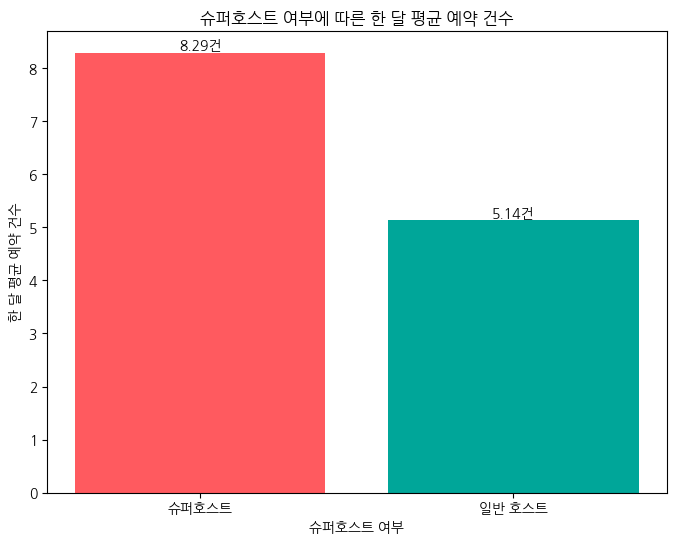

In [ ]:
# Calculate the mean bookings per month for superhosts and non-superhosts
mean_bookings_by_superhost = df.groupby('host_is_superhost')['bookings_per_month'].mean().reset_index()

# Map 0 and 1 to Korean labels for plotting
mean_bookings_by_superhost['host_is_superhost_label'] = mean_bookings_by_superhost['host_is_superhost'].map({0: '일반 호스트', 1: '슈퍼호스트'})

# Ensure the order is '슈퍼호스트' then '일반 호스트' for plotting
mean_bookings_by_superhost = mean_bookings_by_superhost.set_index('host_is_superhost_label').loc[['슈퍼호스트', '일반 호스트']].reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(mean_bookings_by_superhost['host_is_superhost_label'], mean_bookings_by_superhost['bookings_per_month'], color=['#ff5a5f', '#00a699'])
plt.title('슈퍼호스트 여부에 따른 한 달 평균 예약 건수')
plt.xlabel('슈퍼호스트 여부')
plt.ylabel('한 달 평균 예약 건수')

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}건', va='bottom', ha='center')

plt.show()

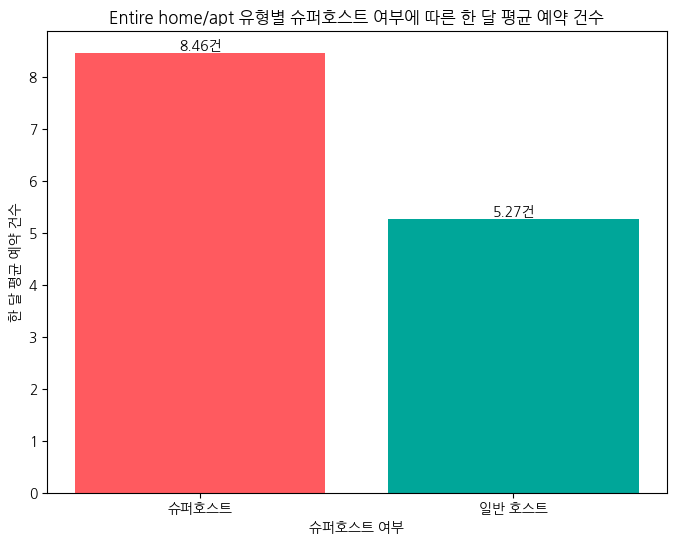

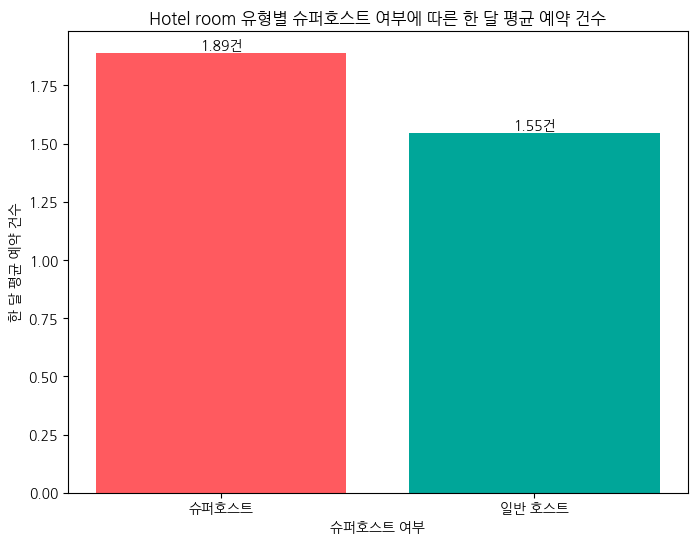

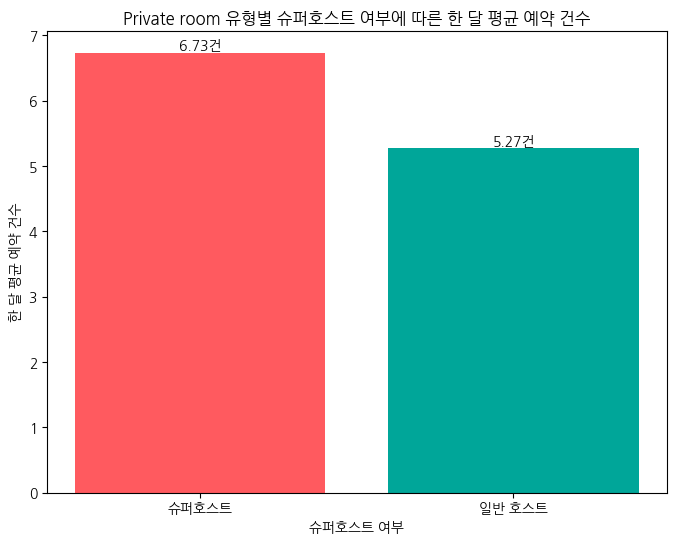

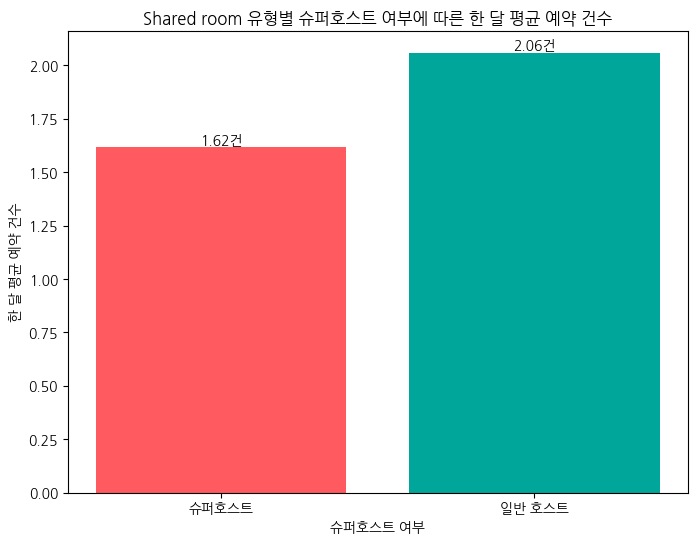

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the mean bookings per month for each room type and superhost status
mean_bookings_by_room_type_superhost = df.groupby(['room_type', 'host_is_superhost'])['bookings_per_month'].mean().reset_index()

# Get unique room types
room_types = mean_bookings_by_room_type_superhost['room_type'].unique()

# Create a bar chart for each room type
for room_type in room_types:
    plt.figure(figsize=(8, 6))
    # Explicitly create a copy to avoid SettingWithCopyWarning
    subset = mean_bookings_by_room_type_superhost[mean_bookings_by_room_type_superhost['room_type'] == room_type].copy()

    # Ensure both '슈퍼호스트' and '일반 호스트' are present for plotting, add missing if necessary
    if 0 not in subset['host_is_superhost'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_is_superhost': [0], 'bookings_per_month': [0]})], ignore_index=True)
    if 1 not in subset['host_is_superhost'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_is_superhost': [1], 'bookings_per_month': [0]})], ignore_index=True)


    # Map 0 and 1 to Korean labels for plotting and order them
    subset['host_is_superhost_label'] = subset['host_is_superhost'].map({0: '일반 호스트', 1: '슈퍼호스트'})
    subset = subset.set_index('host_is_superhost_label').loc[['슈퍼호스트', '일반 호스트']].reset_index()


    bars = plt.bar(subset['host_is_superhost_label'], subset['bookings_per_month'], color=['#ff5a5f', '#00a699'])
    plt.title(f'{room_type} 유형별 슈퍼호스트 여부에 따른 한 달 평균 예약 건수')
    plt.xlabel('슈퍼호스트 여부')
    plt.ylabel('한 달 평균 예약 건수')

    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}건', va='bottom', ha='center') # Add text label with '건' and 2 decimal places

    plt.show()

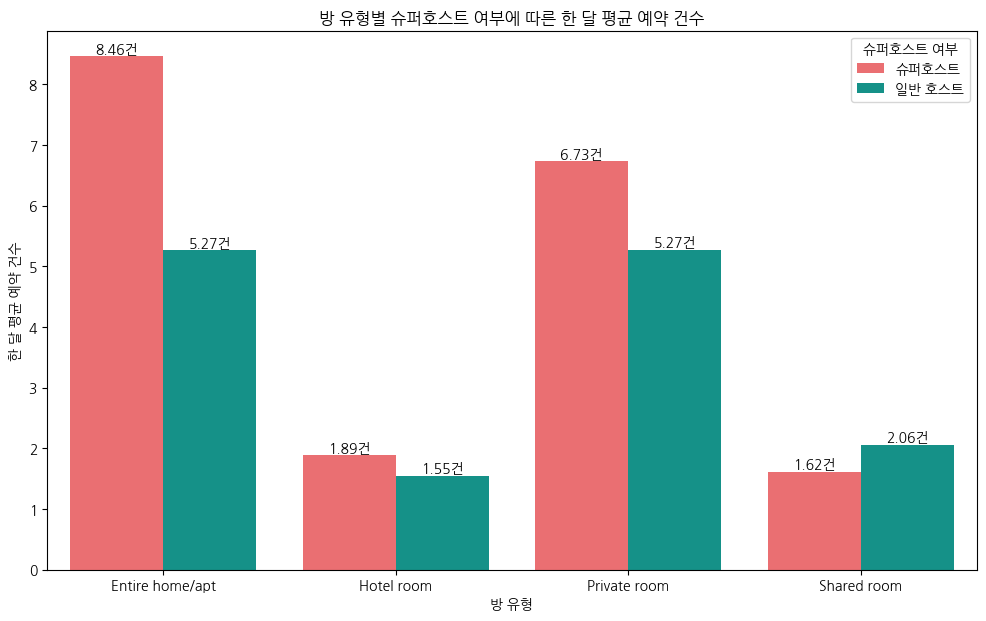

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the mean bookings per month for each room type and superhost status
mean_bookings_by_room_type_superhost = df.groupby(['room_type', 'host_is_superhost'])['bookings_per_month'].mean().reset_index()

# Map 0 and 1 to Korean labels for plotting
mean_bookings_by_room_type_superhost['host_is_superhost_label'] = mean_bookings_by_room_type_superhost['host_is_superhost'].map({0: '일반 호스트', 1: '슈퍼호스트'})

# Ensure the order is '슈퍼호스트' then '일반 호스트' for the hue legend and bars
hue_order = ['슈퍼호스트', '일반 호스트']

# Create a single bar chart using seaborn
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=mean_bookings_by_room_type_superhost,
            x='room_type',
            y='bookings_per_month',
            hue='host_is_superhost_label',
            palette=['#ff5a5f', '#00a699'], # Set colors: #ff5a5f for Superhost, #00a699 for Regular
            hue_order=hue_order) # Apply the specified order


plt.title('방 유형별 슈퍼호스트 여부에 따른 한 달 평균 예약 건수')
plt.xlabel('방 유형')
plt.ylabel('한 달 평균 예약 건수')
# plt.grid(axis='y') # Remove y-grid as requested
plt.legend(title='슈퍼호스트 여부')

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f건', label_type='edge')


plt.show()

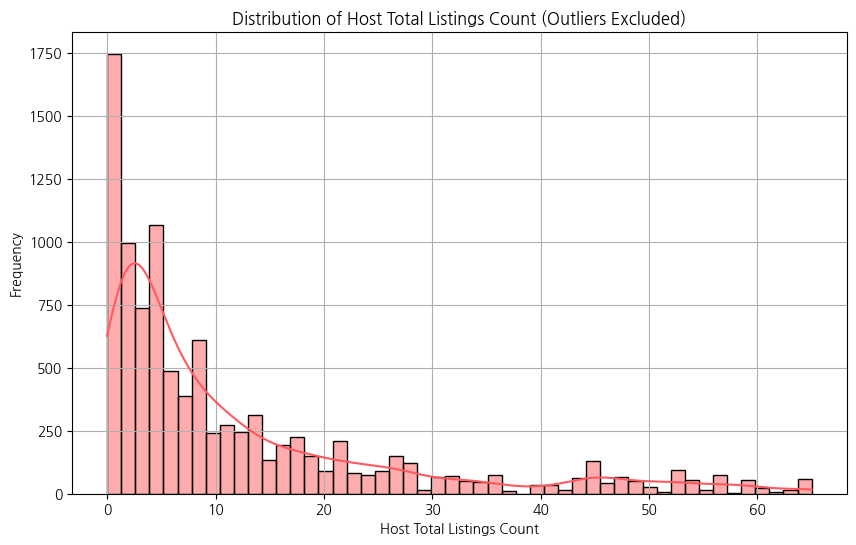

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR for 'host_total_listings_count'
Q1 = df['host_total_listings_count'].quantile(0.25)
Q3 = df['host_total_listings_count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to exclude outliers
filtered_df = df[(df['host_total_listings_count'] >= lower_bound) & (df['host_total_listings_count'] <= upper_bound)].copy()

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['host_total_listings_count'], bins=50, kde=True, color='#ff5a5f')
plt.title('Distribution of Host Total Listings Count (Outliers Excluded)')
plt.xlabel('Host Total Listings Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

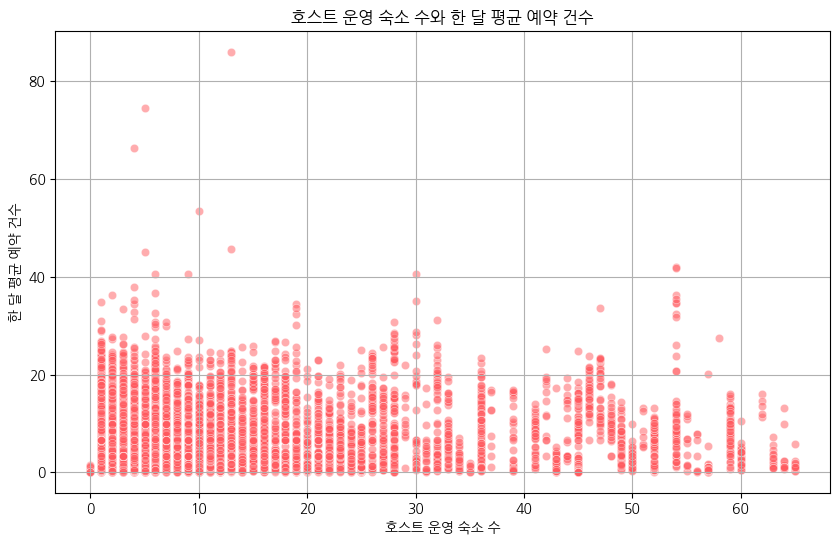

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR for 'host_total_listings_count'
Q1 = df['host_total_listings_count'].quantile(0.25)
Q3 = df['host_total_listings_count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to exclude outliers
filtered_df = df[(df['host_total_listings_count'] >= lower_bound) & (df['host_total_listings_count'] <= upper_bound)].copy()


# Create a scatter plot to visualize the relationship between host_total_listings_count and bookings_per_month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='host_total_listings_count', y='bookings_per_month', alpha=0.5, color='#ff5a5f')
plt.title('호스트 운영 숙소 수와 한 달 평균 예약 건수')
plt.xlabel('호스트 운영 숙소 수')
plt.ylabel('한 달 평균 예약 건수')
plt.grid(True)
plt.show()

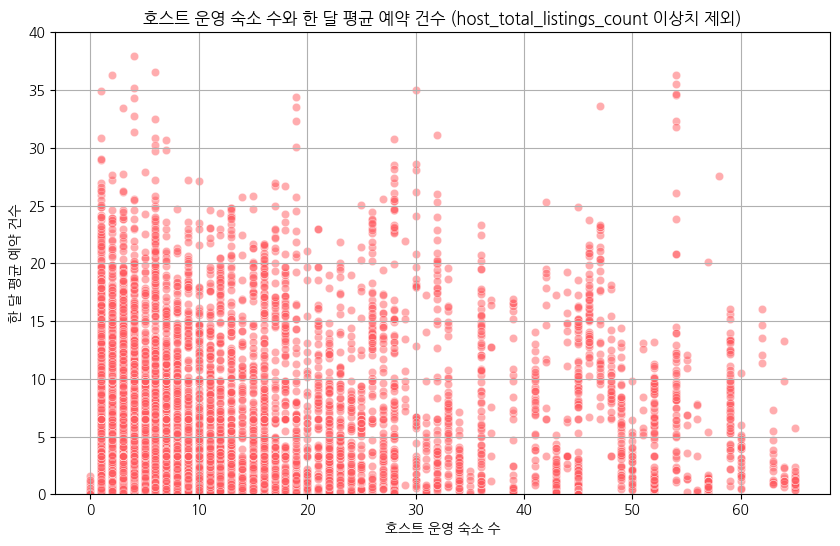

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR for 'host_total_listings_count'
Q1_listings = df['host_total_listings_count'].quantile(0.25)
Q3_listings = df['host_total_listings_count'].quantile(0.75)
IQR_listings = Q3_listings - Q1_listings

# Define outlier bounds for 'host_total_listings_count'
lower_bound_listings = Q1_listings - 1.5 * IQR_listings
upper_bound_listings = Q3_listings + 1.5 * IQR_listings

# Filter data to exclude outliers from 'host_total_listings_count' only
filtered_df = df[
    (df['host_total_listings_count'] >= lower_bound_listings) & (df['host_total_listings_count'] <= upper_bound_listings)
].copy()


# Create a scatter plot to visualize the relationship between host_total_listings_count and bookings_per_month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='host_total_listings_count', y='bookings_per_month', alpha=0.5, color='#ff5a5f')
plt.title('호스트 운영 숙소 수와 한 달 평균 예약 건수 (host_total_listings_count 이상치 제외)')
plt.xlabel('호스트 운영 숙소 수')
plt.ylabel('한 달 평균 예약 건수')
plt.grid(True)
plt.ylim(0, 40) # Set y-axis limit
plt.show()

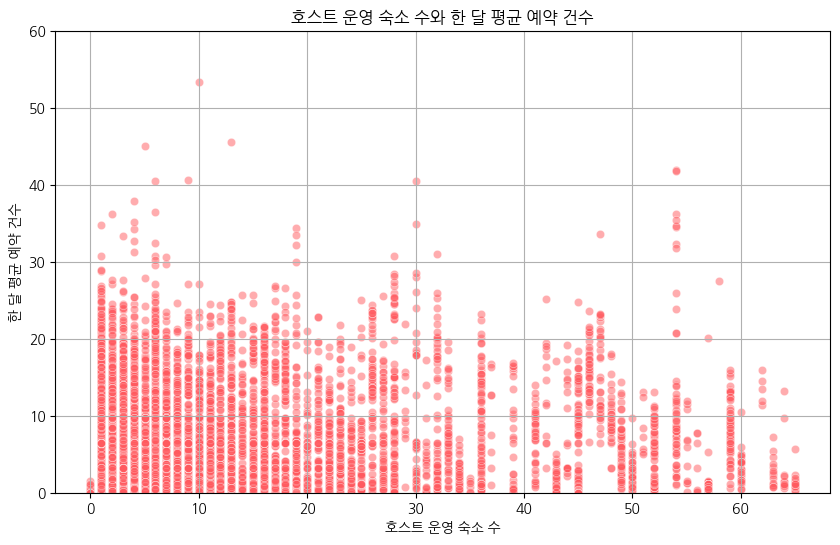

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR for 'host_total_listings_count'
Q1_listings = df['host_total_listings_count'].quantile(0.25)
Q3_listings = df['host_total_listings_count'].quantile(0.75)
IQR_listings = Q3_listings - Q1_listings

# Define outlier bounds for 'host_total_listings_count'
lower_bound_listings = Q1_listings - 1.5 * IQR_listings
upper_bound_listings = Q3_listings + 1.5 * IQR_listings

# Filter data to exclude outliers from 'host_total_listings_count' only
filtered_df = df[
    (df['host_total_listings_count'] >= lower_bound_listings) & (df['host_total_listings_count'] <= upper_bound_listings)
].copy()


# Create a scatter plot to visualize the relationship between host_total_listings_count and bookings_per_month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='host_total_listings_count', y='bookings_per_month', alpha=0.5, color='#ff5a5f')
plt.title('호스트 운영 숙소 수와 한 달 평균 예약 건수')
plt.xlabel('호스트 운영 숙소 수')
plt.ylabel('한 달 평균 예약 건수')
plt.grid(True)
plt.ylim(0, 60) # Set y-axis limit
plt.show()

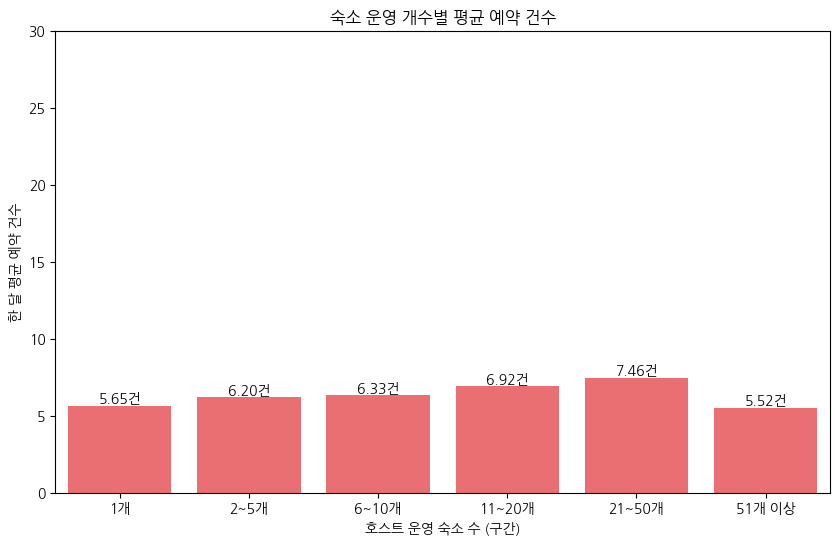

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. IQR 기반으로 host_total_listings_count의 이상치 제거 (기존 코드 동일)
Q1_listings = df['host_total_listings_count'].quantile(0.25)
Q3_listings = df['host_total_listings_count'].quantile(0.75)
IQR_listings = Q3_listings - Q1_listings

lower_bound_listings = Q1_listings - 1.5 * IQR_listings
upper_bound_listings = Q3_listings + 1.5 * IQR_listings

filtered_df = df[
    (df['host_total_listings_count'] >= lower_bound_listings) &
    (df['host_total_listings_count'] <= upper_bound_listings)
].copy()

# 2. 숙소 수를 구간(bin)으로 나누기
bins = [0, 1, 5, 10, 20, 50, 100]  # 필요시 조정 가능
labels = ['1개', '2~5개', '6~10개', '11~20개', '21~50개', '51개 이상']
filtered_df['숙소수_구간'] = pd.cut(filtered_df['host_total_listings_count'], bins=bins, labels=labels, include_lowest=True)

# 3. 구간별 평균 예약 건수 계산
grouped = filtered_df.groupby('숙소수_구간')['bookings_per_month'].mean().reset_index()

# 4. 막대그래프 그리기
plt.figure(figsize=(10,6))
ax = sns.barplot(data=grouped, x='숙소수_구간', y='bookings_per_month', color='#ff5a5f') # Fix: Changed y to 'bookings_per_month'

plt.title('숙소 운영 개수별 평균 예약 건수')
plt.xlabel('호스트 운영 숙소 수 (구간)')
plt.ylabel('한 달 평균 예약 건수')
plt.ylim(0, 30)  # 발표용으로 보기 좋게 y축 제한

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f건', label_type='edge')


plt.show()

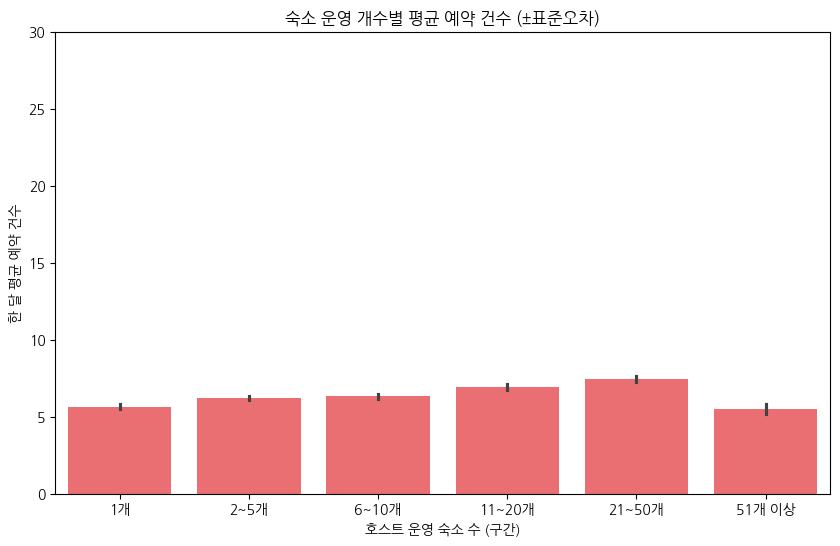

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. IQR 기반 이상치 제거
Q1_listings = df['host_total_listings_count'].quantile(0.25)
Q3_listings = df['host_total_listings_count'].quantile(0.75)
IQR_listings = Q3_listings - Q1_listings

lower_bound_listings = Q1_listings - 1.5 * IQR_listings
upper_bound_listings = Q3_listings + 1.5 * IQR_listings

filtered_df = df[
    (df['host_total_listings_count'] >= lower_bound_listings) &
    (df['host_total_listings_count'] <= upper_bound_listings)
].copy()

# 2. 숙소 수 구간 나누기
bins = [0, 1, 5, 10, 20, 50, 100]
labels = ['1개', '2~5개', '6~10개', '11~20개', '21~50개', '51개 이상']
filtered_df['숙소수_구간'] = pd.cut(filtered_df['host_total_listings_count'], bins=bins, labels=labels, include_lowest=True)

# 3. 막대그래프 (평균 + 표준오차 에러바)
plt.figure(figsize=(10,6))
sns.barplot(
    data=filtered_df,
    x='숙소수_구간',
    y='bookings_per_month',
    estimator='mean',         # 평균
    errorbar='se',            # 표준오차(standard error) / 'sd'로 바꾸면 표준편차
    color='#ff5a5f'
)

plt.title('숙소 운영 개수별 평균 예약 건수 (±표준오차)')
plt.xlabel('호스트 운영 숙소 수 (구간)')
plt.ylabel('한 달 평균 예약 건수')
plt.ylim(0, 30)
plt.show()


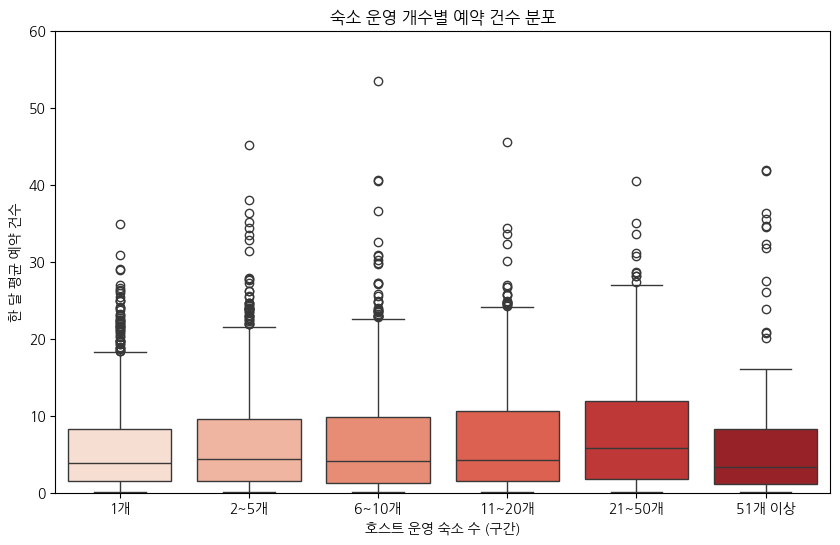

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. IQR 기반 이상치 제거 (기존 동일)
Q1_listings = df['host_total_listings_count'].quantile(0.25)
Q3_listings = df['host_total_listings_count'].quantile(0.75)
IQR_listings = Q3_listings - Q1_listings

lower_bound_listings = Q1_listings - 1.5 * IQR_listings
upper_bound_listings = Q3_listings + 1.5 * IQR_listings

filtered_df = df[
    (df['host_total_listings_count'] >= lower_bound_listings) &
    (df['host_total_listings_count'] <= upper_bound_listings)
].copy()

# 2. 숙소 수 구간 나누기
bins = [0, 1, 5, 10, 20, 50, 100]
labels = ['1개', '2~5개', '6~10개', '11~20개', '21~50개', '51개 이상']
filtered_df['숙소수_구간'] = pd.cut(filtered_df['host_total_listings_count'], bins=bins, labels=labels, include_lowest=True)

# 3. 박스플롯 시각화
plt.figure(figsize=(10,6))
sns.boxplot(
    data=filtered_df,
    x='숙소수_구간',
    y='bookings_per_month',
    palette='Reds'
)

plt.title('숙소 운영 개수별 예약 건수 분포')
plt.xlabel('호스트 운영 숙소 수 (구간)')
plt.ylabel('한 달 평균 예약 건수')
plt.ylim(0, 60)  # 보기 좋은 y축 범위 조정
plt.show()


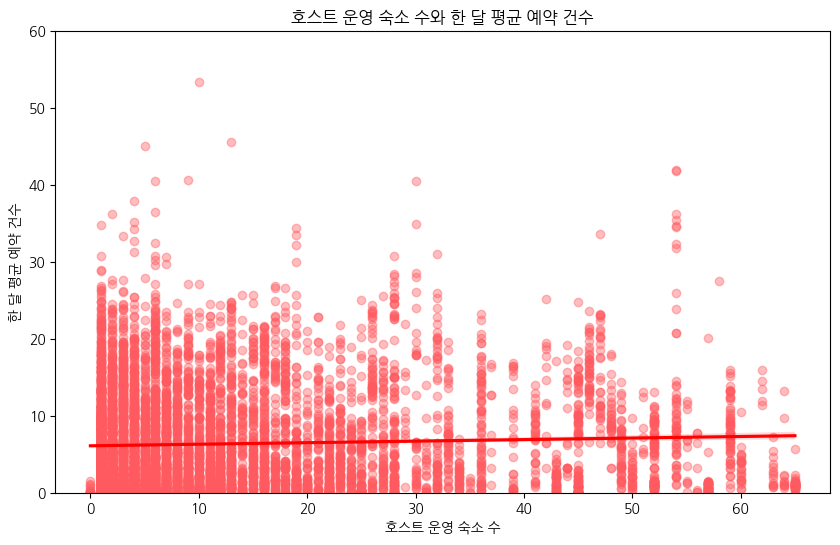

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=filtered_df,
    x='host_total_listings_count',
    y='bookings_per_month',
    scatter_kws={'alpha':0.4, 'color':'#ff5a5f'},
    line_kws={'color':'red'}
)

plt.title('호스트 운영 숙소 수와 한 달 평균 예약 건수')
plt.xlabel('호스트 운영 숙소 수')
plt.ylabel('한 달 평균 예약 건수')
plt.ylim(0, 60)
plt.show()


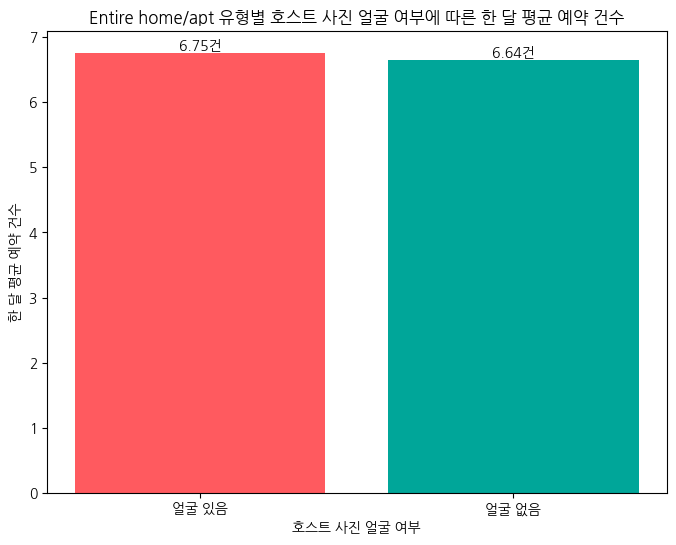

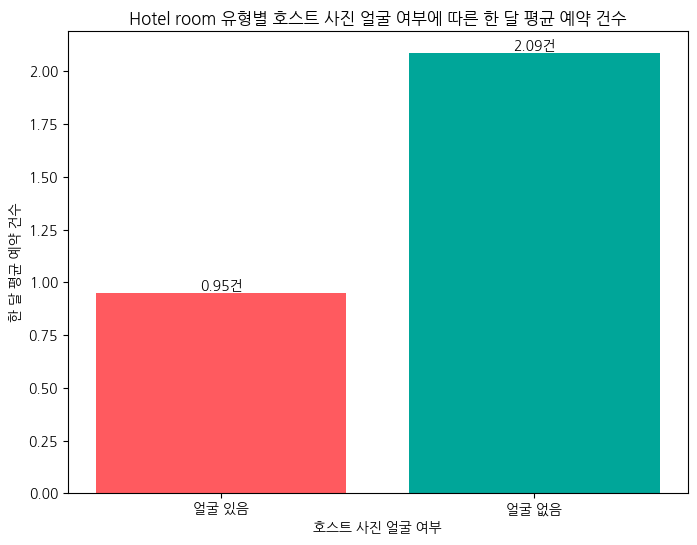

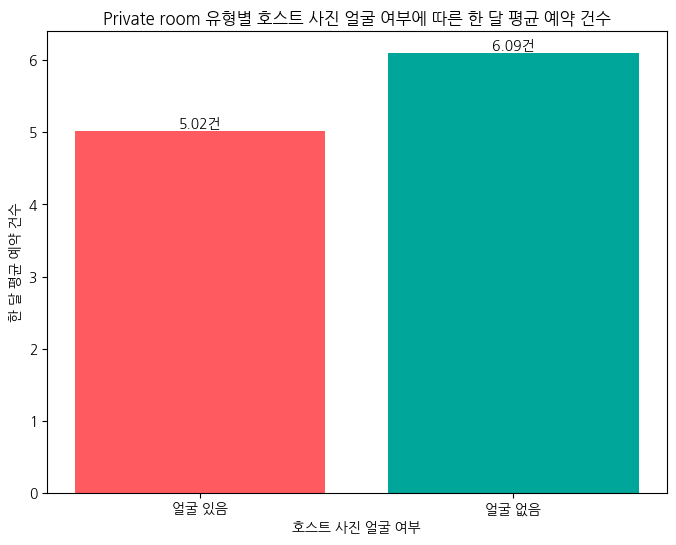

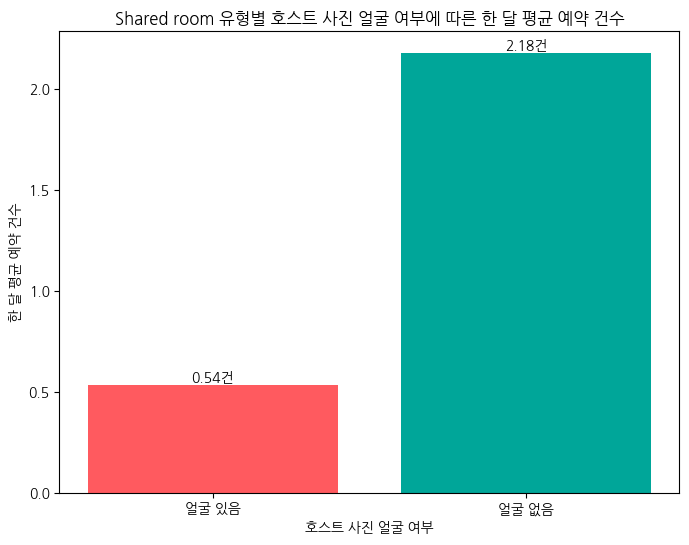

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the mean bookings per month for each room type and face in picture status
mean_bookings_by_room_type_face = df.groupby(['room_type', 'host_face_detected'])['bookings_per_month'].mean().reset_index()

# Get unique room types
room_types = mean_bookings_by_room_type_face['room_type'].unique()

# Create a bar chart for each room type
for room_type in room_types:
    plt.figure(figsize=(8, 6))
    # Explicitly create a copy to avoid SettingWithCopyWarning
    subset = mean_bookings_by_room_type_face[mean_bookings_by_room_type_face['room_type'] == room_type].copy()

    # Ensure both '얼굴 있음' and '얼굴 없음' are present for plotting, add missing if necessary
    # Add missing categories with 0 bookings to ensure consistent bars
    if 0.0 not in subset['host_face_detected'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_face_detected': [0.0], 'bookings_per_month': [0.0]})], ignore_index=True)
    if 1.0 not in subset['host_face_detected'].values:
      subset = pd.concat([subset, pd.DataFrame({'room_type': [room_type], 'host_face_detected': [1.0], 'bookings_per_month': [0.0]})], ignore_index=True)


    # Map 0 and 1 to Korean labels for plotting and order them
    subset['host_face_detected_label'] = subset['host_face_detected'].map({0.0: '얼굴 없음', 1.0: '얼굴 있음'})
    subset = subset.set_index('host_face_detected_label').loc[['얼굴 있음', '얼굴 없음']].reset_index()


    bars = plt.bar(subset['host_face_detected_label'], subset['bookings_per_month'], color=['#ff5a5f', '#00a699'])
    plt.title(f'{room_type} 유형별 호스트 사진 얼굴 여부에 따른 한 달 평균 예약 건수')
    plt.xlabel('호스트 사진 얼굴 여부')
    plt.ylabel('한 달 평균 예약 건수')

    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}건', va='bottom', ha='center') # Add text label with '건' and 2 decimal places

    plt.show()

# 통계검증

In [ ]:
from scipy import stats

# Separate the bookings_per_month data for verified and unverified hosts
verified_bookings = df[df['host_identity_verified'] == 1]['bookings_per_month'].dropna()
unverified_bookings = df[df['host_identity_verified'] == 0]['bookings_per_month'].dropna()

# Perform independent samples t-test
ttest_result = stats.ttest_ind(verified_bookings, unverified_bookings)

# Print the results
print("독립표본 t-검정 결과:")
print(f"검정 통계량 (t-statistic): {ttest_result.statistic:.4f}")
print(f"유의확률 (p-value): {ttest_result.pvalue:.4f}")

# Interpret the results
alpha = 0.05
if ttest_result.pvalue < alpha:
    print(f"\n유의수준 {alpha}에서, 호스트 인증 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.")
else:
    print(f"\n유의수준 {alpha}에서, 호스트 인증 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 없습니다.")

독립표본 t-검정 결과:
검정 통계량 (t-statistic): 10.1257
유의확률 (p-value): 0.0000

유의수준 0.05에서, 호스트 인증 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.


In [ ]:
from scipy.stats import mannwhitneyu

# Separate the bookings_per_month data for verified and unverified hosts
verified_bookings = df[df['host_identity_verified'] == 1]['bookings_per_month'].dropna()
unverified_bookings = df[df['host_identity_verified'] == 0]['bookings_per_month'].dropna()

# Perform Mann-Whitney U test for host identity verification
mannwhitneyu_identity = mannwhitneyu(verified_bookings, unverified_bookings, alternative='two-sided')

# Print the results
print("Mann-Whitney U 검정 결과 (호스트 인증 여부):")
print(f"검정 통계량 (U-statistic): {mannwhitneyu_identity.statistic:.4f}")
print(f"유의확률 (p-value): {mannwhitneyu_identity.pvalue}")

# Interpret the results
alpha = 0.05
if mannwhitneyu_identity.pvalue < alpha:
    print(f"\n유의수준 {alpha}에서, 호스트 인증 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.")
else:
    print(f"\n유의수준 {alpha}에서, 호스트 인증 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 없습니다.")

print("-" * 30)

# Separate the bookings_per_month data for superhosts and non-superhosts
superhost_bookings = df[df['host_is_superhost'] == 1]['bookings_per_month'].dropna()
non_superhost_bookings = df[df['host_is_superhost'] == 0]['bookings_per_month'].dropna()

# Perform Mann-Whitney U test for superhost status
mannwhitneyu_superhost = mannwhitneyu(superhost_bookings, non_superhost_bookings, alternative='two-sided')

# Print the results
print("Mann-Whitney U 검정 결과 (슈퍼호스트 여부):")
print(f"검정 통계량 (U-statistic): {mannwhitneyu_superhost.statistic:.4f}")
print(f"유의확률 (p-value): {mannwhitneyu_superhost.pvalue}")

# Interpret the results
alpha = 0.05
if mannwhitneyu_superhost.pvalue < alpha:
    print(f"\n유의수준 {alpha}에서, 슈퍼호스트 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.")
else:
    print(f"\n유의수준 {alpha}에서, 슈퍼호스트 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 없습니다.")

Mann-Whitney U 검정 결과 (호스트 인증 여부):
검정 통계량 (U-statistic): 2015769.0000
유의확률 (p-value): 2.2243005599063911e-44

유의수준 0.05에서, 호스트 인증 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.
------------------------------
Mann-Whitney U 검정 결과 (슈퍼호스트 여부):
검정 통계량 (U-statistic): 15285726.0000
유의확률 (p-value): 7.824203794677963e-178

유의수준 0.05에서, 슈퍼호스트 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.


In [ ]:
from scipy.stats import mannwhitneyu

# Separate the bookings_per_month data for listings with and without a face in the picture
face_bookings = df[df['host_face_detected'] == 1]['bookings_per_month'].dropna()
no_face_bookings = df[df['host_face_detected'] == 0]['bookings_per_month'].dropna()

# Perform Mann-Whitney U test
mannwhitneyu_face = mannwhitneyu(face_bookings, no_face_bookings, alternative='two-sided')

# Print the results
print("Mann-Whitney U 검정 결과 (호스트 사진 얼굴 여부):")
print(f"검정 통계량 (U-statistic): {mannwhitneyu_face.statistic:.4f}")
print(f"유의확률 (p-value): {mannwhitneyu_face.pvalue}")

# Interpret the results
alpha = 0.05
if mannwhitneyu_face.pvalue < alpha:
    print(f"\n유의수준 {alpha}에서, 호스트 사진에 얼굴이 있는지 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.")
else:
    print(f"\n유의수준 {alpha}에서, 호스트 사진에 얼굴이 있는지 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 없습니다.")

Mann-Whitney U 검정 결과 (호스트 사진 얼굴 여부):
검정 통계량 (U-statistic): 12583322.0000
유의확률 (p-value): 0.03462341168580583

유의수준 0.05에서, 호스트 사진에 얼굴이 있는지 여부에 따라 한 달 평균 예약 건수에 유의미한 차이가 있습니다.


In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Calculate Q1, Q3, and IQR for 'host_total_listings_count' to identify outliers
Q1 = df['host_total_listings_count'].quantile(0.25)
Q3 = df['host_total_listings_count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to include only the outliers
outliers_df = df[(df['host_total_listings_count'] < lower_bound) | (df['host_total_listings_count'] > upper_bound)].copy()

# Drop rows with NaN values in either column within the outliers DataFrame
outliers_df_cleaned = outliers_df[['host_total_listings_count', 'bookings_per_month']].dropna()

# Check if there are enough data points to perform correlation
if len(outliers_df_cleaned) > 1:
    # Perform Pearson correlation test on the outlier data
    correlation, p_value = pearsonr(outliers_df_cleaned['host_total_listings_count'], outliers_df_cleaned['bookings_per_month'])

    # Print the results
    print("이상치 데이터에 대한 Pearson 상관 계수 및 유의확률:")
    print(f"Pearson 상관 계수: {correlation:.4f}")
    print(f"유의확률 (p-value): {p_value:.4f}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print(f"\n유의수준 {alpha}에서, 이상치 데이터 내 host_total_listings_count와 bookings_per_month 간에 유의미한 선형 관계가 있습니다.")
    else:
        print(f"\n유의수준 {alpha}에서, 이상치 데이터 내 host_total_listings_count와 bookings_per_month 간에 유의미한 선형 관계가 없습니다.")
else:
    print("이상치 데이터 내에 상관 분석을 수행할 충분한 데이터 포인트가 없습니다.")

이상치 데이터에 대한 Pearson 상관 계수 및 유의확률:
Pearson 상관 계수: -0.0752
유의확률 (p-value): 0.0037

유의수준 0.05에서, 이상치 데이터 내 host_total_listings_count와 bookings_per_month 간에 유의미한 선형 관계가 있습니다.


# 머신러닝

## 랜덤포레스트

In [ ]:
# =======================
# 1. X, y 정의
# =======================
y = df['success']
X = df[['host_identity_verified', 'host_is_superhost', 'instant_bookable']]

# =======================
# 2. 데이터 분할
# =======================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# Handle missing values (Imputation)
# =======================
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# =======================
# 3. SMOTE 적용
# =======================
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("원본:", y_train.value_counts())
print("리샘플링:", y_res.value_counts())

# =======================
# 4. 모델 학습
# =======================
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
clf.fit(X_res, y_res)

# =======================
# 5. 평가
# =======================
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

원본: success
0    7769
1    1387
Name: count, dtype: int64
리샘플링: success
0    7769
1    7769
Name: count, dtype: int64
[[1398  545]
 [  67  280]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1943
           1       0.34      0.81      0.48       347

    accuracy                           0.73      2290
   macro avg       0.65      0.76      0.65      2290
weighted avg       0.86      0.73      0.77      2290

ROC-AUC: 0.7925005302415675


In [ ]:
# room_type 추가
X = pd.get_dummies(df[['host_identity_verified', 'host_is_superhost',
                       'instant_bookable', 'room_type']],
                   drop_first=True)

y = df['success']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values (Imputation)
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# SMOTE 적용
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# 모델 학습
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
clf.fit(X_res, y_res)

# 평가
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

[[1403  540]
 [  67  280]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1943
           1       0.34      0.81      0.48       347

    accuracy                           0.73      2290
   macro avg       0.65      0.76      0.65      2290
weighted avg       0.86      0.73      0.77      2290

ROC-AUC: 0.8083128529072812


In [ ]:
# host_face_detected 추가
X = pd.get_dummies(df[['host_identity_verified', 'host_is_superhost',
                       'instant_bookable', 'room_type', 'host_face_detected']],
                   drop_first=True)

y = df['success']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values (Imputation)
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# SMOTE 적용
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# 모델 학습
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
clf.fit(X_res, y_res)

# 평가
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

[[1424  519]
 [  69  278]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      1943
           1       0.35      0.80      0.49       347

    accuracy                           0.74      2290
   macro avg       0.65      0.77      0.66      2290
weighted avg       0.86      0.74      0.78      2290

ROC-AUC: 0.8147929239818991


In [ ]:
# X 변경
X = pd.get_dummies(df[['host_identity_verified', 'host_is_superhost','host_response_rate','host_response_time','last_review', 'price',
                        'room_type', 'host_face_detected']],
                   drop_first=True)

y = df['success']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values (Imputation)
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# SMOTE 적용
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# 모델 학습
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
clf.fit(X_res, y_res)

# 평가
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

[[1852   91]
 [ 271   76]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1943
           1       0.46      0.22      0.30       347

    accuracy                           0.84      2290
   macro avg       0.66      0.59      0.60      2290
weighted avg       0.81      0.84      0.82      2290

ROC-AUC: 0.8077907689021848


In [ ]:
# 하이퍼 파라미터 조정
X = pd.get_dummies(df[['host_identity_verified', 'host_is_superhost','host_response_rate','host_response_time','last_review', 'price',
                        'room_type', 'host_face_detected']],
                   drop_first=True)

y = df['success']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values (Imputation)
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# SMOTE 적용
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("원본:", y_train.value_counts())
print("리샘플링:", y_res.value_counts())

# =======================
# 4. 모델 학습 (Hyperparameter Tuning with GridSearchCV)
# =======================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV to the resampled data
grid_search.fit(X_res, y_res)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters:", best_params)
print("Best ROC-AUC Score (on resampled training data):", best_score)

# Train the model with the best parameters on the resampled data
best_clf = grid_search.best_estimator_
best_clf.fit(X_res, y_res)

# =======================
# 5. 평가 (using the best model on the test set)
# =======================

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:,1]

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))
print("\nROC-AUC (Test Set):", roc_auc_score(y_test, y_proba))

원본: success
0    7769
1    1387
Name: count, dtype: int64
리샘플링: success
0    7769
1    7769
Name: count, dtype: int64

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best ROC-AUC Score (on resampled training data): 0.9898952387921304

Confusion Matrix (Test Set):
[[1840  103]
 [ 249   98]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1943
           1       0.49      0.28      0.36       347

    accuracy                           0.85      2290
   macro avg       0.68      0.61      0.64      2290
weighted avg       0.82      0.85      0.83      2290


ROC-AUC (Test Set): 0.8218506988064744


In [ ]:
# X 변경
X = pd.get_dummies(
    df[['host_identity_verified', 'host_is_superhost','host_response_rate',
        'host_response_time','last_review', 'room_type', 'host_face_detected','price']],
    drop_first=True
)
feature_names = X.columns.tolist()   # ★ 중요: 이후 중요도 매핑용

y = df['success']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values (Imputation)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

# SMOTE 적용
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# 모델 학습
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
clf.fit(X_res, y_res)

# 평가
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred  = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# =======================
# 피처임폴턴스 (모델 기반)
# =======================
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(clf.feature_importances_, index=feature_names)\
               .sort_values(ascending=False)

print("\n[Top 30 Feature Importances]")
print(importances.head(30).round(4))

# (선택) 시각화 Top 20
top_k = 20
plt.figure(figsize=(7, 8))
importances.head(top_k)[::-1].plot(kind='barh')
plt.title(f'RandomForest Feature Importances (Top {top_k})')
plt.xlabel('Gini importance')
plt.tight_layout()
plt.show()


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)


Confusion Matrix:
[[1777  166]
 [ 211  136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1943
           1       0.45      0.39      0.42       347

    accuracy                           0.84      2290
   macro avg       0.67      0.65      0.66      2290
weighted avg       0.83      0.84      0.83      2290

ROC-AUC: 0.8289477782507515

[Top 30 - Model-based Feature Importances]
host_is_superhost                        0.2690
price                                    0.1918
days_since_last_review                   0.1498
host_face_detected                       0.0856
recent_180d                              0.0620
last_review_month_sin                    0.0530
recent_90d                               0.0450
last_review_month_cos                    0.0360
room_type_Private room                   0.0256
recent_30d                               0.0233
host_response_time_within an hour        0.0208
hos

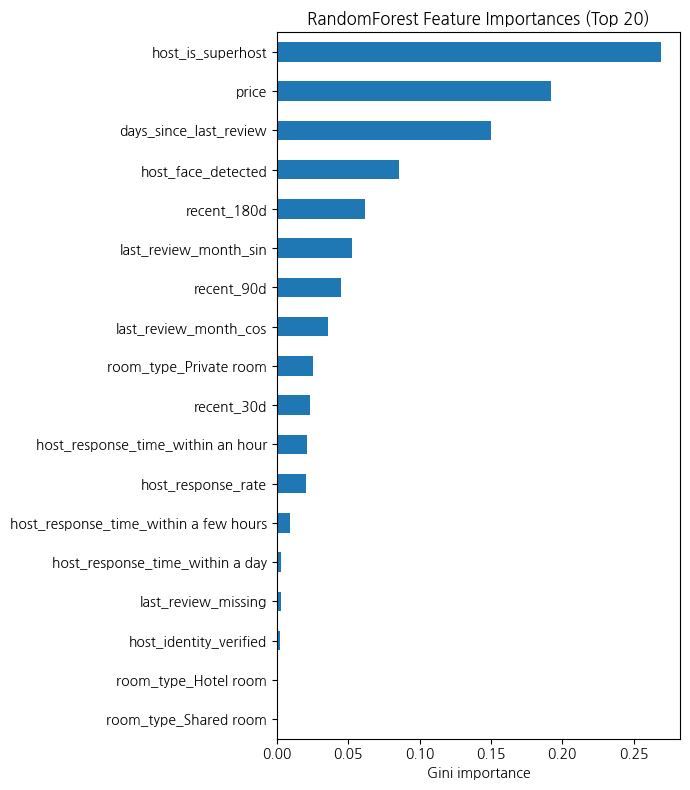


[Top 30 - Permutation Importances on Test (AUC decrease)]
host_is_superhost                        0.1313
recent_180d                              0.1023
days_since_last_review                   0.0509
recent_90d                               0.0323
price                                    0.0166
recent_30d                               0.0155
host_face_detected                       0.0151
room_type_Private room                   0.0094
host_response_rate                       0.0090
host_response_time_within an hour        0.0064
last_review_month_cos                    0.0018
host_response_time_within a few hours    0.0010
host_response_time_within a day          0.0010
host_identity_verified                   0.0007
last_review_missing                      0.0007
room_type_Shared room                    0.0005
room_type_Hotel room                    -0.0003
last_review_month_sin                   -0.0044
dtype: float64


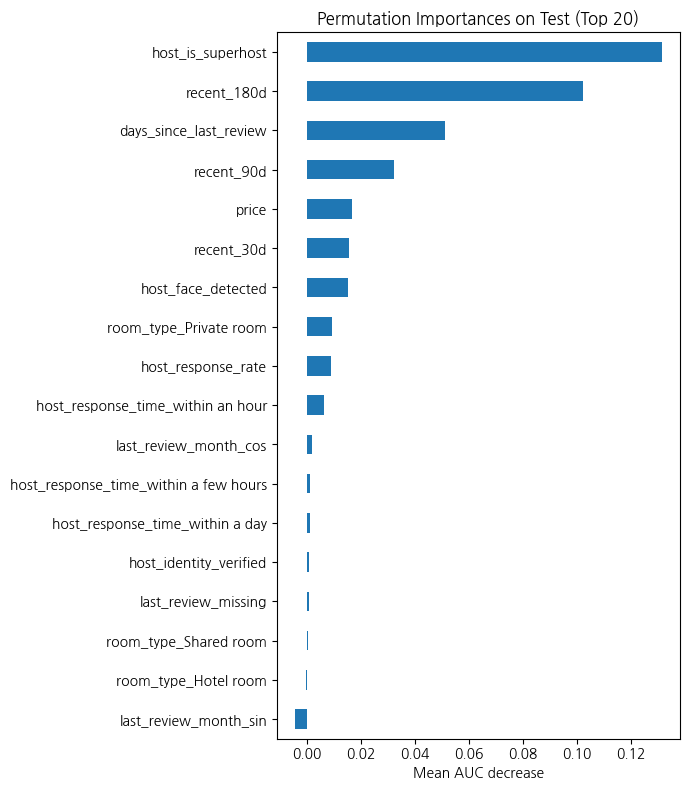

In [ ]:
# =========================================
# 0) 라이브러리
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.inspection import permutation_importance

# =========================================
# 1) 날짜/수치 전처리
# =========================================
# 날짜 파싱
df['last_review']  = pd.to_datetime(df['last_review'],  errors='coerce')
df['last_scraped'] = pd.to_datetime(df['last_scraped'], errors='coerce')

# 응답률/가격 문자열 안전 변환
if df['host_response_rate'].dtype == 'object':
    df['host_response_rate'] = (
        df['host_response_rate'].str.rstrip('%').replace('', np.nan).astype(float) / 100.0
    )

if df['price'].dtype == 'object':
    df['price'] = (df['price']
                   .replace('[\$,]', '', regex=True)
                   .replace('', np.nan)
                   .astype(float))

# # 가격 로그(선택) - 왜도 완화
# df['price_log1p'] = np.log1p(df['price'])

# =========================================
# 2) 리뷰 최신성 파생 (누수 방지: 각 행의 last_scraped 기준)
# =========================================
# 각 행에서 last_scraped - last_review (일수)
df['days_since_last_review'] = (df['last_scraped'] - df['last_review']).dt.days

# 결측 플래그(리뷰가 없거나 파싱 실패)
df['last_review_missing'] = df['days_since_last_review'].isna().astype(int)

# days 결측 보정: "가장 오래됨"을 표현하는 큰 값으로 대체
max_days = df['days_since_last_review'].max()
fill_val = (max_days + 1) if pd.notna(max_days) else 9999
df['days_since_last_review'] = df['days_since_last_review'].fillna(fill_val)

# (선택) 계절성 피처: 월 → 사인/코사인 주기 인코딩
df['last_review_month'] = df['last_review'].dt.month.fillna(0)
df['last_review_month_sin'] = np.sin(2 * np.pi * df['last_review_month'] / 12)
df['last_review_month_cos'] = np.cos(2 * np.pi * df['last_review_month'] / 12)

# (선택) 해석형 버킷 피처
df['recent_30d']  = (df['days_since_last_review'] <= 30).astype(int)
df['recent_90d']  = (df['days_since_last_review'] <= 90).astype(int)
df['recent_180d'] = (df['days_since_last_review'] <= 180).astype(int)

# =========================================
# 3) X, y 구성 (날짜는 파생 피처만 사용, 원-핫은 핵심 범주만)
# =========================================
cat_cols  = ['host_identity_verified', 'host_is_superhost',
             'host_response_time', 'room_type', 'host_face_detected']
num_cols  = ['host_response_rate', 'price', # price_log1p 대신 price 사용
             'days_since_last_review', 'last_review_missing',
             'last_review_month_sin', 'last_review_month_cos',
             'recent_30d', 'recent_90d', 'recent_180d']

# 필요 없다면 위 num_cols에서 월/버킷 피처 몇 개는 제거해도 됩니다.
X_cats = pd.get_dummies(df[cat_cols], drop_first=True)
X_nums = df[num_cols]
X = pd.concat([X_nums, X_cats], axis=1)

y = df['success']
feature_names = X.columns.tolist()   # ★ 중요: 이후 중요도 매핑용

# =========================================
# 4) 데이터 분할 → 결측치 보간 → SMOTE
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  # numpy 변환됨
X_test  = imputer.transform(X_test)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# =========================================
# 5) 모델 학습
# =========================================
clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"  # ※ SMOTE와 동시 사용은 과보정 가능 → None도 비교 권장
)
clf.fit(X_res, y_res)

# =========================================
# 6) 평가
# =========================================
y_pred  = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# =========================================
# 7) 피처 중요도 (모델 기반: Gini importance)
# =========================================
rf_importances = pd.Series(clf.feature_importances_, index=feature_names)\
                .sort_values(ascending=False)

print("\n[Top 30 - Model-based Feature Importances]")
print(rf_importances.head(30).round(4))

plt.figure(figsize=(7, 8))
rf_importances.head(20)[::-1].plot(kind='barh')
plt.title('RandomForest Feature Importances (Top 20)')
plt.xlabel('Gini importance')
plt.tight_layout()
plt.show()

# =========================================
# 8) 퍼뮤테이션 중요도 (검증셋 성능 저하 기반, ROC-AUC)
# =========================================
perm = permutation_importance(
    clf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc'
)
perm_importances = pd.Series(perm.importances_mean, index=feature_names)\
                   .sort_values(ascending=False)

print("\n[Top 30 - Permutation Importances on Test (AUC decrease)]")
print(perm_importances.head(30).round(4))

plt.figure(figsize=(7, 8))
perm_importances.head(20)[::-1].plot(kind='barh')
plt.title('Permutation Importances on Test (Top 20)')
plt.xlabel('Mean AUC decrease')
plt.tight_layout()
plt.show()

##light gbm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import lightgbm as lgb

In [ ]:
# 타깃 정의
df['success'] = ((df['number_of_reviews_ltm'] >= 5) &
                    (df['review_scores_rating'] >= 4.9)).astype(int)

# 누수 방지: 타깃 생성에 사용한 컬럼 제거
drop_leak_cols = ['success', 'number_of_reviews_ltm', 'review_scores_rating',
                  'number_of_reviews','reviews_per_month','bookings_per_month','number_of_reviews_l30d',
                  'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location','review_scores_value']
X = df.drop(columns=drop_leak_cols)
y = df['success']

In [ ]:
#모델정의
#의미 없는 텍스트형 컬럼 제거
drop_cols = ["name", "description", "neighborhood_overview",
             "host_name", "host_about", "host_location"]
X = X.drop(columns=[c for c in drop_cols if c in X.columns])

#원핫 인코딩
cat_cols = X.select_dtypes(include=['object','category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

#컬럼명 안전하게 치환
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

#중복 컬럼 제거
X = X.loc[:, ~X.columns.duplicated()]


# --- 학습/검증 분리 ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- LightGBM 모델 정의 ---
clf = LGBMClassifier(
    n_estimators=1000,          # 트리 개수 늘리기
    learning_rate=0.01,         # 학습률 낮추기
    num_leaves=127,             # 트리 리프 수 확대 (복잡도 ↑)
    max_depth=-1,               # 트리 깊이 제한 해제
    min_child_samples=20,       # 최소 데이터 수 줄이기
    subsample=0.8,              # 배깅(랜덤 샘플링)
    colsample_bytree=0.8,       # 피처 샘플링
    reg_alpha=0.1,              # L1 규제 추가
    reg_lambda=0.1,             # L2 규제 추가
    random_state=42,
    n_jobs=-1
)

# --- 학습 ---
clf.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
)

# --- 예측 ---
proba = clf.predict_proba(X_val)[:, 1]
pred = (proba >= 0.5).astype(int)

# --- 성능 평가 ---
print("Accuracy:", accuracy_score(y_val, pred))
print("ROC-AUC:", roc_auc_score(y_val, proba))
print("F1:", f1_score(y_val, pred))
print(classification_report(y_val, pred))

[LightGBM] [Info] Number of positive: 1387, number of negative: 7769
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.199023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3574
[LightGBM] [Info] Number of data points in the train set: 9156, number of used features: 523
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151485 -> initscore=-1.722998
[LightGBM] [Info] Start training from score -1.722998
Accuracy: 0.8838427947598253
ROC-AUC: 0.8940347452838164
F1: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1943
           1       0.68      0.44      0.53       347

    accuracy                           0.88      2290
   macro avg       0.79      0.70      0.73      2290
weighted avg       0.87      0.88      0.87      2290



## HistGradientBoostingClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.inspection import permutation_importance

# 3. X값 정의 (평점, 리뷰 관련 칼럼 제외,무의미한 컬럼 제외)
drop_cols = ['success', 'number_of_reviews_ltm', 'review_scores_rating',
                  'number_of_reviews','reviews_per_month','bookings_per_month','number_of_reviews_l30d',
                  'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location','review_scores_value',
             'host_total_listings_count','host_listings_count','calculated_host_listings_count',
             'host_thumbnail_url','id','host_about','last_scraped','host_picture_url','host_id'
             ]
X = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')
y = df['success']

# 4. 범주형 변수 인코딩
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. 스케일링 (선택적)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. 모델 학습 (HistGradientBoosting → NaN 자동 처리 가능)
gb_model = HistGradientBoostingClassifier(
    max_iter=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
gb_model.fit(X_train, y_train)

# 8. 예측 및 평가
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# 9. 피처 중요도 (Permutation Importance 사용)
importances = permutation_importance(gb_model, X_test, y_test, n_repeats=10, random_state=42)
importance_series = pd.Series(importances.importances_mean, index=X.columns)

print("\n=== Feature Importances (Permutation) ===")
print(importance_series.sort_values(ascending=False).head(15))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1943
           1       0.62      0.42      0.50       347

    accuracy                           0.87      2290
   macro avg       0.76      0.69      0.72      2290
weighted avg       0.86      0.87      0.86      2290

ROC-AUC: 0.9054464337361192

=== Feature Importances (Permutation) ===
host_is_superhost                               0.024017
first_review                                    0.012838
last_review                                     0.012314
calculated_host_listings_count_entire_homes     0.005677
calculated_host_listings_count_private_rooms    0.005240
host_picture_url                                0.004847
host_neighbourhood                              0.004454
amenities                                       0.003930
host_id                                         0.003668
longitude                                       0.003493
in